In [33]:
import pandas as pd

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,12)

In [35]:
airbnb = pd.read_csv("data/airbnb.1.initial_process.csv")

In [36]:
#look for duplicate rooms
airbnb.room_id.value_counts().head()

4524031     1
17331115    1
5568673     1
17187773    1
5464935     1
Name: room_id, dtype: int64

In [37]:
#check for repeated values in columns
n_records = len(airbnb)
def duplicate_values_col(df):
    for column in df:
        column_counts = df[column].value_counts()
        most_common = column_counts.iloc[0]
        least_common = column_counts.iloc[-1]
        print("{} | {}-{} | {}".format(
            df[column].name,
            round(most_common / (1.0 * n_records),3),
            round(least_common / (1.0 * n_records),3),
            df[column].dtype
        ))

duplicate_values_col(airbnb)

room_id | 0.0-0.0 | int64
host_id | 0.013-0.0 | int64
room_type | 0.738-0.013 | object
neighborhood | 0.211-0.002 | object
overall_satisfaction | 0.348-0.0 | float64
accommodates | 0.303-0.001 | int64
bedrooms | 0.557-0.001 | float64
price | 0.059-0.0 | float64


In [38]:
airbnb.room_type.value_counts(normalize=True)

Entire home/apt    0.737908
Private room       0.249169
Shared room        0.012923
Name: room_type, dtype: float64

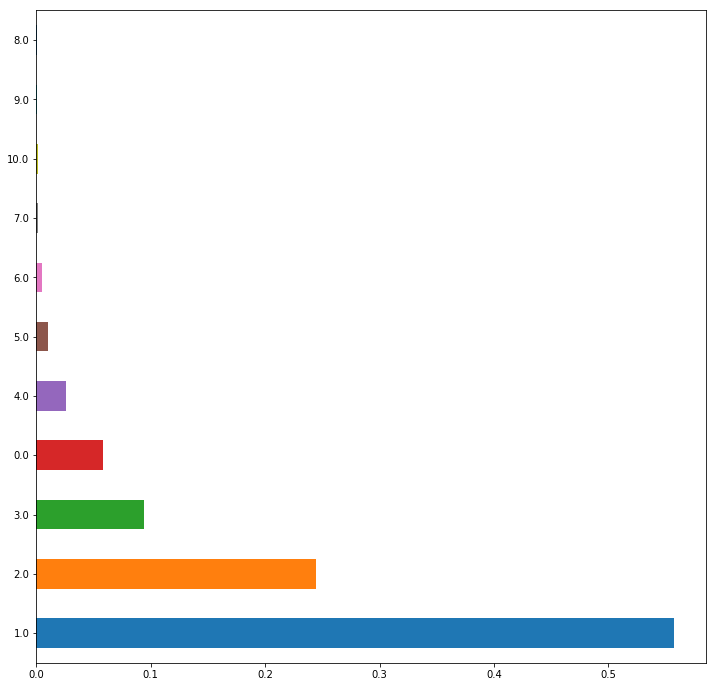

In [39]:
airbnb.bedrooms.value_counts(normalize=True).plot.barh();

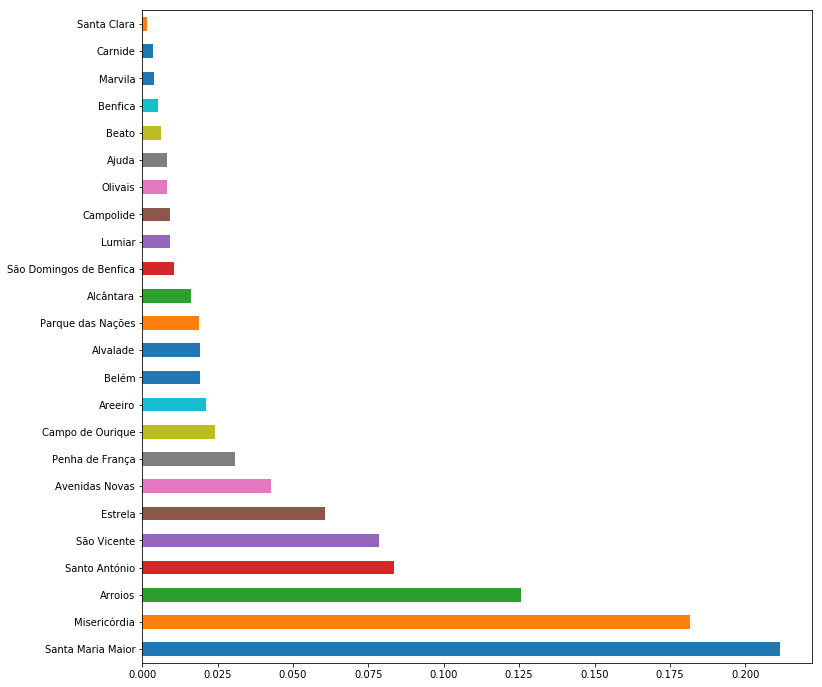

In [40]:
airbnb.neighborhood.value_counts(normalize=True).plot.barh();

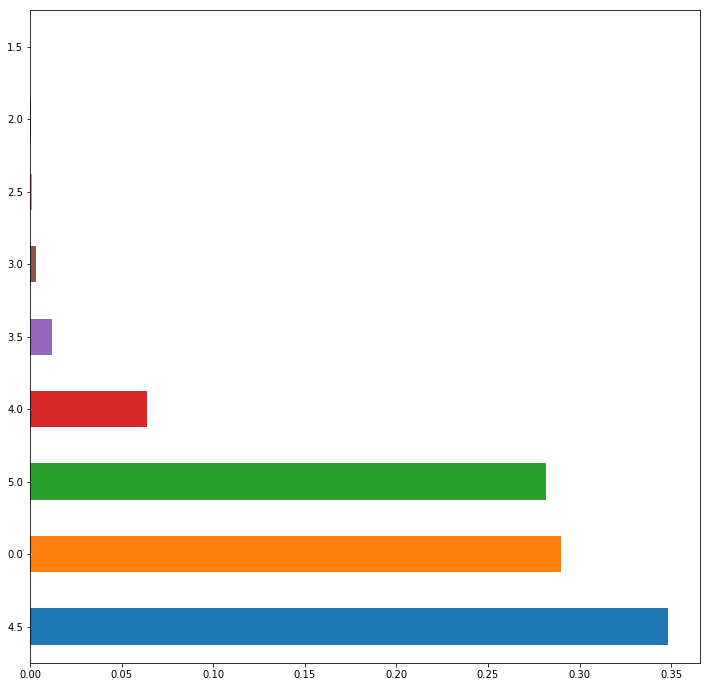

In [41]:
airbnb.overall_satisfaction.value_counts(normalize=True).plot.barh();

In [42]:
#Missing Values
n_records = len(airbnb)
def missing_values_df(df):
    for column in df:
        print("{} | {} | {}".format(
            column, len(df[df[column].isnull()]) / (1.0*n_records), df[column].dtype
        ))

missing_values_df(airbnb)

room_id | 0.0 | int64
host_id | 0.0 | int64
room_type | 0.0 | object
neighborhood | 0.0 | object
overall_satisfaction | 0.0007557436517533253 | float64
accommodates | 0.0 | int64
bedrooms | 0.0 | float64
price | 0.0 | float64


In [43]:
#Searching for outliers
from scipy import stats
import numpy as np

def outliers_col(df):
    for column in df:
        if df[column].dtype != np.object:
            n_outliers = len(df[(np.abs(stats.zscore(df[column])) > 3)& \
                  (df[column].notnull())
                 ])
            print("{} | {} | {}".format(
                df[column].name,
                n_outliers,
                df[column].dtype
        ))

outliers_col(airbnb)

room_id | 0 | int64
host_id | 0 | int64
overall_satisfaction | 0 | float64
accommodates | 231 | int64
bedrooms | 258 | float64
price | 121 | float64


/Users/Chris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


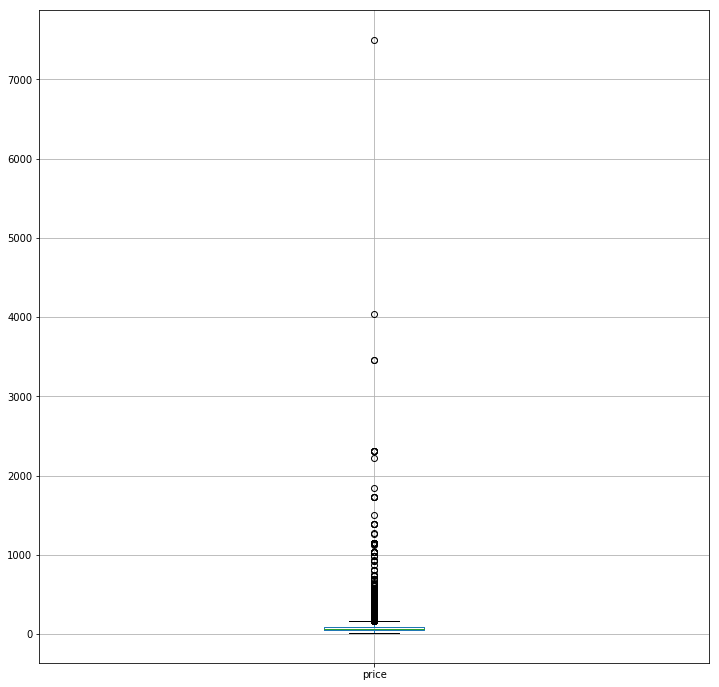

In [44]:
airbnb.boxplot(column='price')

Conclusion

-There are no duplicates of entries based on the room_id. All are unique.
-About 74% of room types are entire houses/apartments, 25% are private single rooms, and the rest are shared rooms.
-A significant majority of the prices of the rooms are below 100 euros, and 121 rooms that cost over 100 are outliers.
-Overall_satisfaction is the only column that is missing a small amount of .values
-Reviews, acommodates, and bedrooms also have a notable number of outliers.
- The neighborhoods Santa Maria Maior and Misericordia are both the most popular and have about 20% of rooms each.

In [46]:
airbnb.to_csv("data/airbnb.2.clean.csv", index=False)